In [1]:
import os
import torch
import dagshub

from tqdm.auto import tqdm

from xrkit.base import CONFIG
from xrkit.models import *
from xrkit.data.dataset import SegmentationDataset

# from xrkit.data.mlflow import save_results, save_images, load_results

from torch.utils.data import DataLoader

import pytorch_lightning as L
from pytorch_lightning.loggers import MLFlowLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

os.chdir("..")
torch.set_float32_matmul_precision("high")
dagshub.init(CONFIG.dagshub.repository_name, CONFIG.dagshub.repository_owner, mlflow=True)

Initialized MLflow to track repo "imonteiroyh/NIH-ChestXRay"

Repository imonteiroyh/NIH-ChestXRay initialized!

In [2]:
train_dataset = SegmentationDataset("train")
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

validation_dataset = SegmentationDataset("validation")
validation_loader = DataLoader(
    validation_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

test_dataset = SegmentationDataset("test")
test_loader = DataLoader(
    test_dataset,
    batch_size=CONFIG.base.batch_size,
    shuffle=False,
    num_workers=CONFIG.base.n_workers,
    pin_memory=True,
    drop_last=False,
)

In [3]:
example = next(iter(train_dataset))

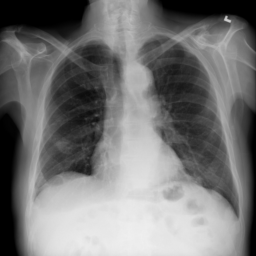

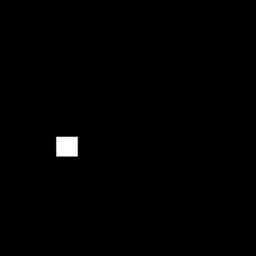

In [4]:
from PIL import Image

image = Image.fromarray((example[0] * 255).numpy()[0, :])
image.show()
image = Image.fromarray((example[1] * 255).numpy()[0, :])
image.show()

In [5]:
input = torch.rand((4, 1, 256, 256))

model = DenseNet201UNetModel(n_epochs=1).network
model(input).shape

torch.Size([4, 1, 256, 256])

In [6]:
input = torch.rand((4, 1, 256, 256))

model = ResNet152V2UNetModel(n_epochs=1).network
model(input).shape

torch.Size([4, 1, 256, 256])

In [7]:
input = torch.rand((4, 1, 256, 256))

model = NASNetLargeUNetModel(n_epochs=1).network
model(input).shape

torch.Size([4, 1, 256, 256])

In [8]:
input = torch.rand((4, 1, 256, 256))

model = VGG19UNetModel(n_epochs=1).network
model(input).shape

torch.Size([4, 1, 256, 256])

In [9]:
# input = torch.rand((4, 1, 256, 256))

# model = VGG19UNetModel(n_epochs=1).network
# model(input).shape

In [3]:
# epochs = 100

# model = ResNet34Model(n_epochs=epochs)

# experiment_name = "debug"
# model_name = model.__class__.__name__.lower()[:-5]
# metric, mode = "validation_f1_score", "max"

# run_name = f"network{model_name}metric{metric}"
# logger = MLFlowLogger(
#     experiment_name=experiment_name, tracking_uri=CONFIG.dagshub.tracking_uri, run_name=run_name
# )

# checkpoint_callback = ModelCheckpoint(
#     monitor=metric,
#     dirpath=f"models/{experiment_name}",
#     filename="resnet34-{epoch:03d}-{validation_f1_score:.2f}",
#     save_top_k=1,
#     mode=mode,
#     enable_version_counter=False,
# )

# early_stop_callback = EarlyStopping(monitor=metric, min_delta=0.00, patience=10, mode=mode)

# trainer = L.Trainer(max_epochs=epochs, logger=logger, callbacks=[checkpoint_callback, early_stop_callback])
# trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=validation_loader)

# run_id = trainer.logger.run_id
# checkpoint_path = checkpoint_callback.best_model_path

# trainer.test(model=model, dataloaders=test_loader, ckpt_path=checkpoint_path)

# trainer = L.Trainer(max_epochs=epochs, logger=logger)
# dataloaders = {"train": train_loader, "validation": validation_loader, "test": test_loader}
# results = trainer.predict(model=model, dataloaders=list(dataloaders.values()), ckpt_path=checkpoint_path)

# save_results(results, dataloaders, trainer)
# save_images(
#     results,
#     dataloaders,
#     trainer,
#     labels=["1dAVb", "RBBB", "LBBB", "SB", "ST", "AF", "N"],
#     confusion_matrix_kwargs={"task": "multiclass", "num_classes": 7},
# )